C:\Users\Yogi\AppData\Local\Temp\ipykernel_26496\3497554626.py:31: RuntimeWarning: invalid value encountered in log
  plt.scatter(l1_noise_samples, np.abs(np.log(A_0_1.flatten()[l1_noise_samples])), c='r', label='Noise')


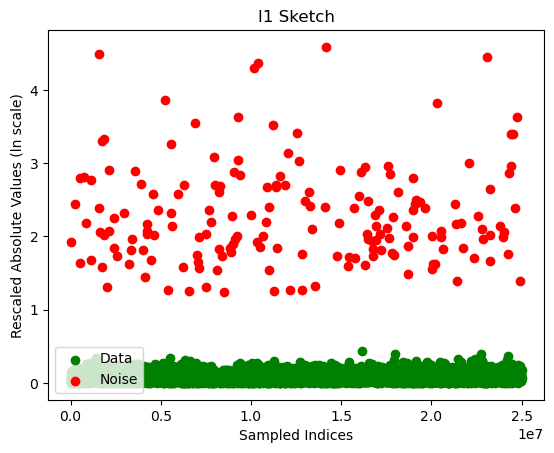

C:\Users\Yogi\AppData\Local\Temp\ipykernel_26496\3497554626.py:40: RuntimeWarning: invalid value encountered in log
  plt.scatter(l2_noise_samples, np.abs(np.log(A_0_1.flatten()[l2_noise_samples])), c='r', label='Noise')


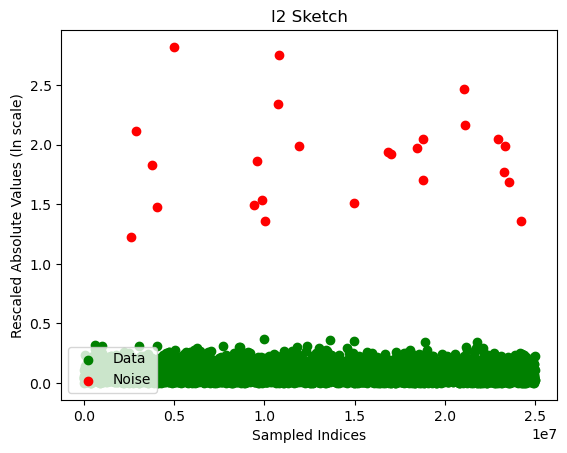

C:\Users\Yogi\AppData\Local\Temp\ipykernel_26496\3497554626.py:49: RuntimeWarning: invalid value encountered in log
  plt.scatter(P_noise_samples, np.abs(np.log(A_0_1.flatten()[P_noise_samples])), c='r', label='Noise')


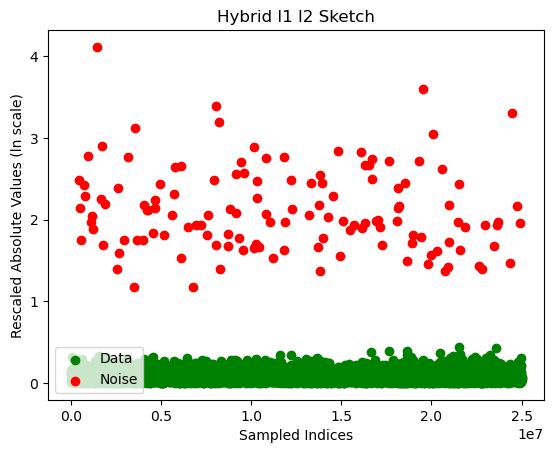

In [10]:

size = 5000
std_dev = 0.1
D = create_D(size)
A_0_1 = create_A_0_1(D, std_dev)
def separate_noise_data(samples, A):
    noise_indices = np.where(np.abs(A.flatten()[samples]) < 0.5)[0]
    data_indices = np.where(np.abs(A.flatten()[samples]) >= 0.5)[0]

    noise_samples = samples[noise_indices]
    data_samples = samples[data_indices]

    return noise_samples, data_samples

alpha = 0.7

l1_prob = np.abs(A_0_1.flatten()) / np.sum(np.abs(A_0_1))
l2_prob = (A_0_1.flatten() ** 2) / np.sum(A_0_1 ** 2)
hybrid_prob = alpha * (np.abs(A_0_1.flatten()) / np.sum(np.abs(A_0_1))) + (1 - alpha) * ((A_0_1.flatten() ** 2) / np.sum(A_0_1 ** 2))

n_plot_samples = 5000
l1_plot_indices = np.random.choice(np.arange(5000 * 5000), size=n_plot_samples, p=l1_prob)
l2_plot_indices = np.random.choice(np.arange(5000 * 5000), size=n_plot_samples, p=l2_prob)
P_plot_indices = np.random.choice(np.arange(5000 * 5000), size=n_plot_samples, p=hybrid_prob)

l1_noise_samples, l1_data_samples = separate_noise_data(l1_plot_indices, A_0_1)
l2_noise_samples, l2_data_samples = separate_noise_data(l2_plot_indices, A_0_1)
P_noise_samples, P_data_samples = separate_noise_data(P_plot_indices, A_0_1)

plt.figure()
plt.scatter(l1_data_samples, np.abs(np.log(A_0_1.flatten()[l1_data_samples])), c='g', label='Data')
plt.scatter(l1_noise_samples, np.abs(np.log(A_0_1.flatten()[l1_noise_samples])), c='r', label='Noise')
plt.xlabel('Sampled Indices')
plt.ylabel('Rescaled Absolute Values (ln scale)')
plt.title('l1 Sketch')
plt.legend(loc='lower left')
plt.show()

plt.figure()
plt.scatter(l2_data_samples, np.abs(np.log(A_0_1.flatten()[l2_data_samples])), c='g', label='Data')
plt.scatter(l2_noise_samples, np.abs(np.log(A_0_1.flatten()[l2_noise_samples])), c='r', label='Noise')
plt.xlabel('Sampled Indices')
plt.ylabel('Rescaled Absolute Values (ln scale)')
plt.title('l2 Sketch')
plt.legend(loc='lower left')
plt.show()

plt.figure()
plt.scatter(P_data_samples, np.abs(np.log(A_0_1.flatten()[P_data_samples])), c='g', label='Data')
plt.scatter(P_noise_samples, np.abs(np.log(A_0_1.flatten()[P_noise_samples])), c='r', label='Noise')
plt.xlabel('Sampled Indices')
plt.ylabel('Rescaled Absolute Values (ln scale)')
plt.title('Hybrid l1 l2 Sketch')
plt.legend(loc='lower left')
plt.show()